In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

# C


# F-test

In [20]:
alpha = 0.05  
sample_num = 20
num_samples = 20
num_params = 3
f_critical = stats.f.ppf(1-alpha, num_params-1, num_samples-num_params)
print("F critical value:", f_critical)

F critical value: 3.5915305684750827


Asymptomatic 

In [3]:
data_asymptomatic = pd.read_csv('./Asymptomatic_Subjects.csv')
data_glucose_a = data_asymptomatic[['gIn','gOut','iOut']]
data_glucose_a['giOut'] = data_asymptomatic['gOut']*data_asymptomatic['iOut']

data_isulin_a = data_asymptomatic[['iIn','gOut','iOut']]

In [18]:
x = data_glucose_a[['gOut','giOut']]
y = data_glucose_a['gIn']
model_glucose_a = Lasso(alpha=0.1)
model_glucose_a.fit(x,y)

Lasso(alpha=0.1)

In [21]:
y_pred = model_glucose_a.predict(data_glucose_a[['gOut','giOut']])

mse = mean_squared_error(y_pred,y)
print("Mean Squared Error:", mse)



# Calculate residuals
residuals = y - y_pred
# Calculate R-squared on the test set
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

# Mean Squared Error for F-statistic calculation
mse_model = mean_squared_error(y, y_pred)  # Model error on training data
mse_residual = np.mean((y - np.mean(y)) ** 2)  # Total variance in y_train

# F-statistic calculation
f_statistic = ((mse_residual - mse_model) / (x.shape[1])) / (mse_model / (x.shape[0] - x.shape[1] - 1))
print("F-statistic:", f_statistic)

Mean Squared Error: 189792.92147129198
R-squared: 0.3939197054605219
F-statistic: 5.524544398788959


Plot our fitted model and data point

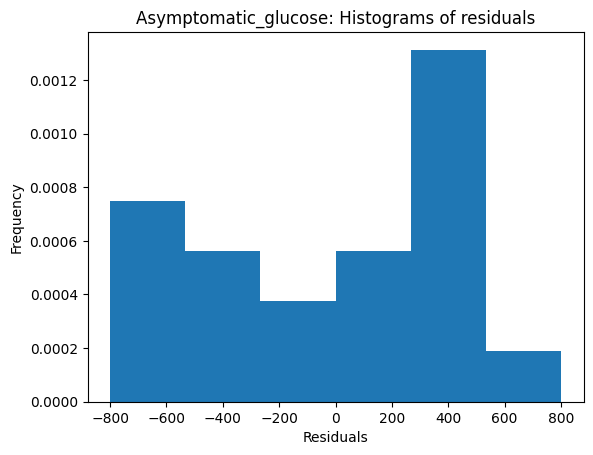

Text(0.5, 1.0, 'Asymptomatic_glucose: Normal Probability Plot')

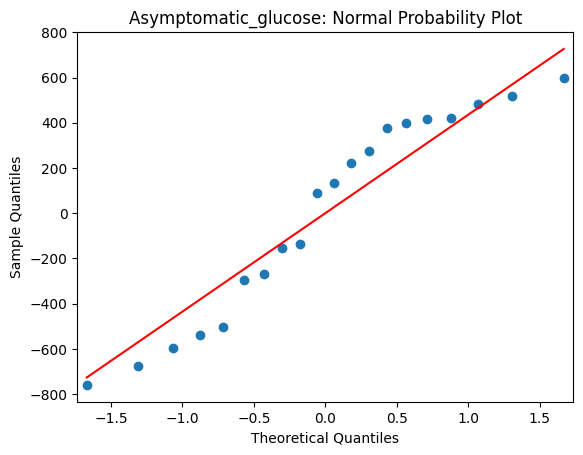

In [44]:

plt.hist(model_glucose_a.resid,bins=6,range=[-800,800],density=True)
plt.title('Asymptomatic_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_a.resid)
pplot1.qqplot(line='s')
plt.title('Asymptomatic_glucose: Normal Probability Plot')

In [30]:
model_isulin_a = ols('iIn ~ 1+iOut+gOut', data=data_isulin_a).fit()
print(model_isulin_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.136
Date:                Thu, 07 Nov 2024   Prob (F-statistic):             0.0344
Time:                        16:10:48   Log-Likelihood:                -99.499
No. Observations:                  20   AIC:                             205.0
Df Residuals:                      17   BIC:                             208.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    731.5407    260.817      2.805      0.0

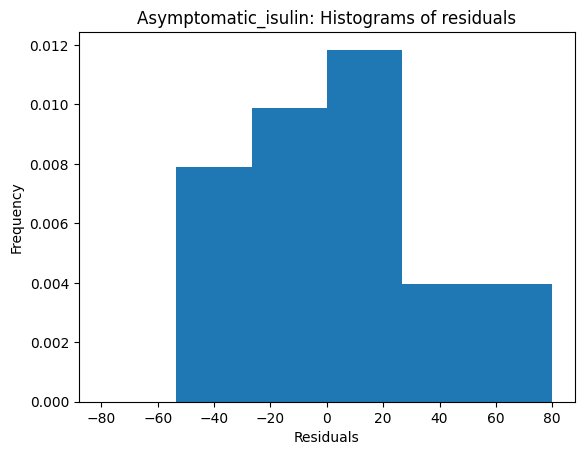

Text(0.5, 1.0, 'Asymptomatic_isulin: Normal Probability Plot')

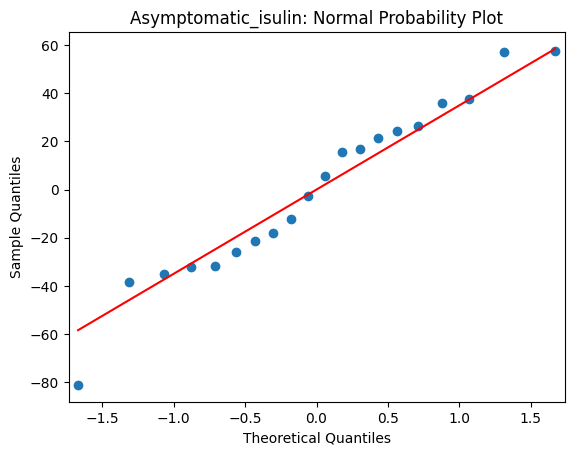

In [43]:
plt.hist(model_isulin_a.resid,bins=6,range=[-80,80],density=True)
plt.title('Asymptomatic_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_a.resid)
pplot1.qqplot(line='s')
plt.title('Asymptomatic_isulin: Normal Probability Plot')

Type I

In [59]:
data_I = pd.read_csv('TypeI_Subjects.csv')
data_glucose_I = data_I[['gIn','gOut','iOut']]
data_isulin_I = data_I[['iIn','gOut','iOut']]
data_glucose_I['giOut'] = data_glucose_I['gOut']*data_glucose_I['iOut']

In [60]:
model_glucose_I = ols('gIn ~ 1+gOut+giOut', data=data_glucose_I).fit()
print(model_glucose_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.969
Date:                Thu, 07 Nov 2024   Prob (F-statistic):             0.0385
Time:                        16:25:08   Log-Likelihood:                -152.67
No. Observations:                  20   AIC:                             311.3
Df Residuals:                      17   BIC:                             314.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2291.4959   1761.490     -1.301      0.2

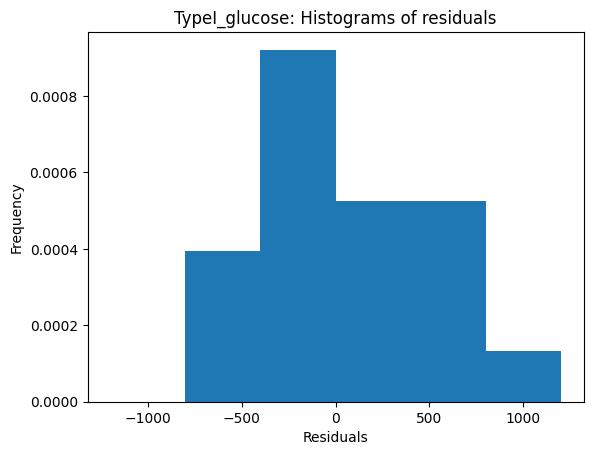

Text(0.5, 1.0, 'TypeI_glucose: Normal Probability Plot')

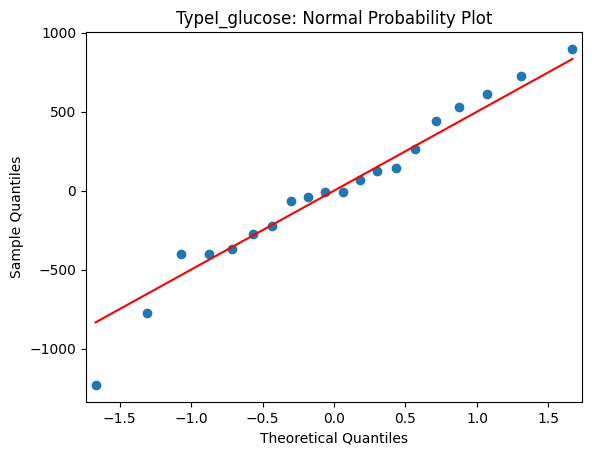

In [61]:
plt.hist(model_glucose_I.resid,bins=6,range=[-1200,1200],density=True)
plt.title('TypeI_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_I.resid)
pplot1.qqplot(line='s')
plt.title('TypeI_glucose: Normal Probability Plot')

In [62]:
model_isulin_I = ols('iIn ~ 1+iOut+gOut', data=data_isulin_I).fit()
print(model_isulin_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     53.70
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.49e-08
Time:                        16:25:35   Log-Likelihood:                -93.630
No. Observations:                  20   AIC:                             193.3
Df Residuals:                      17   BIC:                             196.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    937.6001    122.087      7.680      0.0

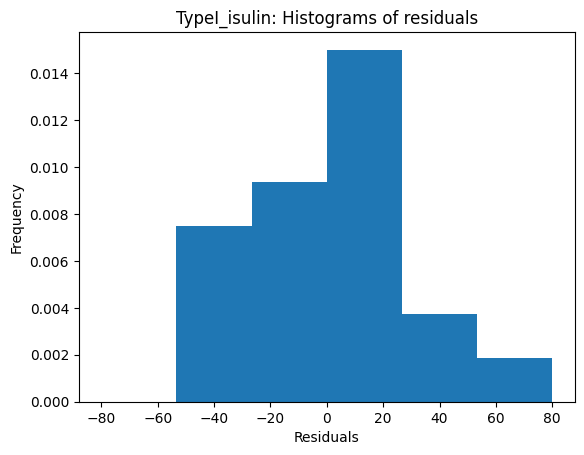

Text(0.5, 1.0, 'TypeI_isulin: Normal Probability Plot')

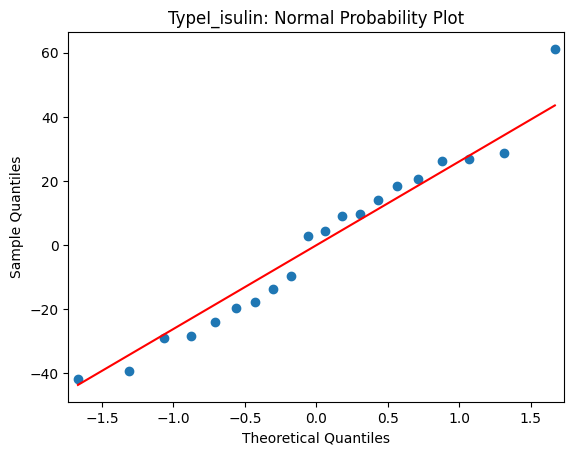

In [63]:
plt.hist(model_isulin_I.resid,bins=6,range=[-80,80],density=True)
plt.title('TypeI_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_I.resid)
pplot1.qqplot(line='s')
plt.title('TypeI_isulin: Normal Probability Plot')

Type II

In [64]:
data_II = pd.read_csv('TypeII_Subjects.csv')
data_glucose_II = data_II[['gIn','gOut','iOut']]
data_glucose_II['giOut'] = data_glucose_II['gOut']*data_glucose_II['iOut']
data_isulin_II = data_II[['iIn','gOut','iOut']]

In [67]:
model_glucose_II = ols('gIn ~ 1+gOut+giOut', data=data_glucose_II).fit()
print(model_glucose_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     24.17
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.07e-05
Time:                        16:26:27   Log-Likelihood:                -140.69
No. Observations:                  20   AIC:                             287.4
Df Residuals:                      17   BIC:                             290.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.007e+04   2121.908     -4.747      0.0

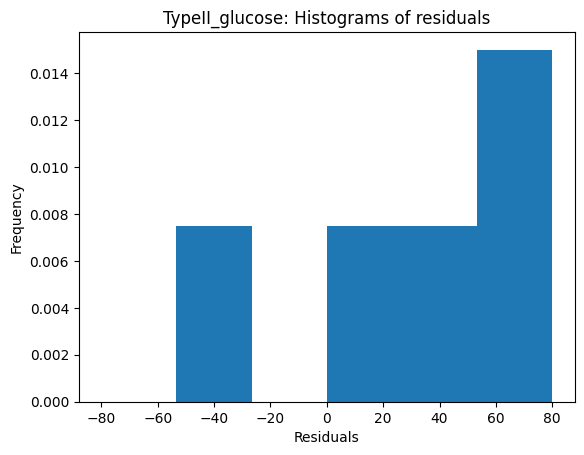

Text(0.5, 1.0, 'TypeII_glucose: Normal Probability Plot')

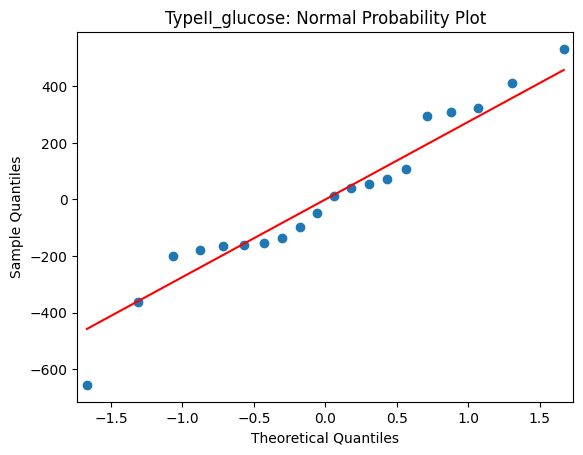

In [68]:
plt.hist(model_glucose_II.resid,bins=6,range=[-80,80],density=True)
plt.title('TypeII_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_II.resid)
pplot1.qqplot(line='s')
plt.title('TypeII_glucose: Normal Probability Plot')

In [69]:
model_isulin_II = ols('iIn ~ 1+iOut+gOut', data=data_isulin_II).fit()
print(model_isulin_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     9.850
Date:                Thu, 07 Nov 2024   Prob (F-statistic):            0.00144
Time:                        16:26:41   Log-Likelihood:                -102.87
No. Observations:                  20   AIC:                             211.7
Df Residuals:                      17   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1024.2849    373.635      2.741      0.0

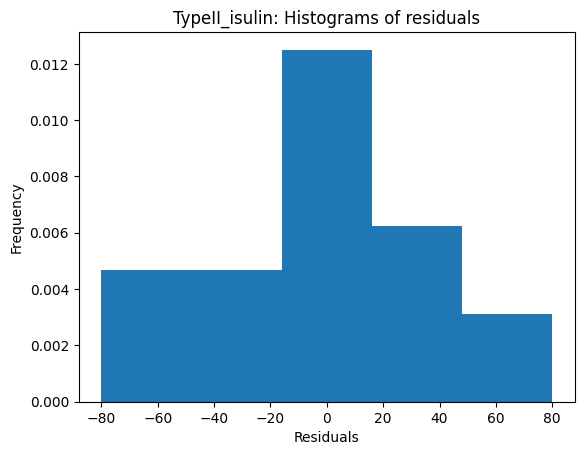

Text(0.5, 1.0, 'TypeII_isulin: Normal Probability Plot')

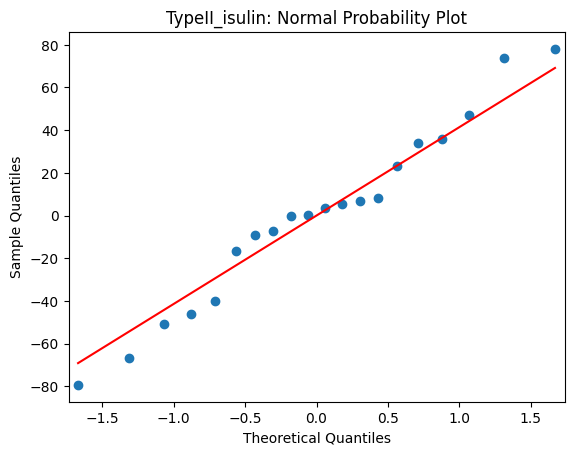

In [70]:
plt.hist(model_isulin_II.resid,bins=5,range=[-80,80],density=True)
plt.title('TypeII_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_II.resid)
pplot1.qqplot(line='s')
plt.title('TypeII_isulin: Normal Probability Plot')

# E

In [71]:
glucose_fomula = ['gIn ~ gOut+giOut','gIn ~ 1+gOut','gIn ~ 1+giOut']
isulin_fomula = ['iIn ~ iOut+gOut','iIn ~ 1+gOut','iIn ~ 1+iOut']

asymptomatic

Glucose

In [75]:
print(f"Full model F value:{model_glucose_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:5.533326301305839

Reduce model F value on asymptomatic
________________________________
Reduced model gIn ~ gOut+giOut
F-statistics: 5.533326301305839
________________________________
Reduced model gIn ~ 1+gOut
F-statistics: 7.626173541526137
________________________________
Reduced model gIn ~ 1+giOut
F-statistics: 2.785328696231792


Insulin

In [76]:
print(f"Full model F value:{model_isulin_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

Full model F value:4.13614660335206

Reduce model F value on asymptomatic
________________________________
iIn ~ iOut+gOut
F-statistics: 4.13614660335206
________________________________
iIn ~ 1+gOut
F-statistics: 7.751733782237714
________________________________
iIn ~ 1+iOut
F-statistics: 0.9860239070284085


Tyep I

Glucose

In [78]:
print(f"Full model F value:{model_glucose_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:3.9689552233087

Reduce model F value on asymptomatic
________________________________
Reduced model gIn ~ gOut+giOut
F-statistics: 5.533326301305839
________________________________
Reduced model gIn ~ 1+gOut
F-statistics: 7.626173541526137
________________________________
Reduced model gIn ~ 1+giOut
F-statistics: 2.785328696231792


Isulin

In [77]:
print(f"Full model F value:{model_isulin_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

Full model F value:53.70297970855455

Reduce model F value on asymptomatic
________________________________
iIn ~ iOut+gOut
F-statistics: 4.13614660335206
________________________________
iIn ~ 1+gOut
F-statistics: 7.751733782237714
________________________________
iIn ~ 1+iOut
F-statistics: 0.9860239070284085


Type II

Glucose

In [256]:
print(f"Full model F value:{model_glucose_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________'*2)
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print("Reduced model",fomula)
    print("F-statistics:",model_glucose_r.fvalue)

Full model F value:22.031329574881934

Reduce model F value on asymptomatic
________________
gIn ~ gOut+gOut*iOut
22.031329574881934
________________
gIn ~ 1+iOut
3.3887475428436806
________________
gIn ~ 1+gOut+gOut
23.78800690270186


Insulin

In [79]:
print(f"Full model F value:{model_isulin_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________'*2)
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print("F-statistics:",model_isulin_r.fvalue)

Full model F value:9.849681483996559

Reduce model F value on asymptomatic
________________________________
iIn ~ iOut+gOut
F-statistics: 4.13614660335206
________________________________
iIn ~ 1+gOut
F-statistics: 7.751733782237714
________________________________
iIn ~ 1+iOut
F-statistics: 0.9860239070284085
